In [1]:
!pip install mediapipe

  Using cached mediapipe-0.10.9-cp310-cp310-win_amd64.whl.metadata (9.8 kB)
  Using cached opencv_contrib_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached protobuf-3.20.3-cp310-cp310-win_amd64.whl (904 kB)
  Using cached sounddevice-0.4.6-py3-none-win_amd64.whl (199 kB)
Using cached mediapipe-0.10.9-cp310-cp310-win_amd64.whl (50.5 MB)
Using cached opencv_contrib_python-4.8.1.78-cp37-abi3-win_amd64.whl (44.8 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.12
    Uninstalling protobuf-4.21.12:
      Successfully uninstalled protobuf-4.21.12


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mysql-connector-python 8.2.0 requires protobuf<=4.21.12,>=4.21.1, but you have protobuf 3.20.3 which is incompatible.
streamlit 1.26.0 requires pillow<10,>=7.1.0, but you have pillow 10.0.1 which is incompatible.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

In [5]:
mp_face_detection = mp.solutions.face_detection
mp_face_mesh = mp.solutions.face_mesh
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.3)
face_mesh = mp_face_mesh.FaceMesh(min_detection_confidence=0.3, min_tracking_confidence=0.3)

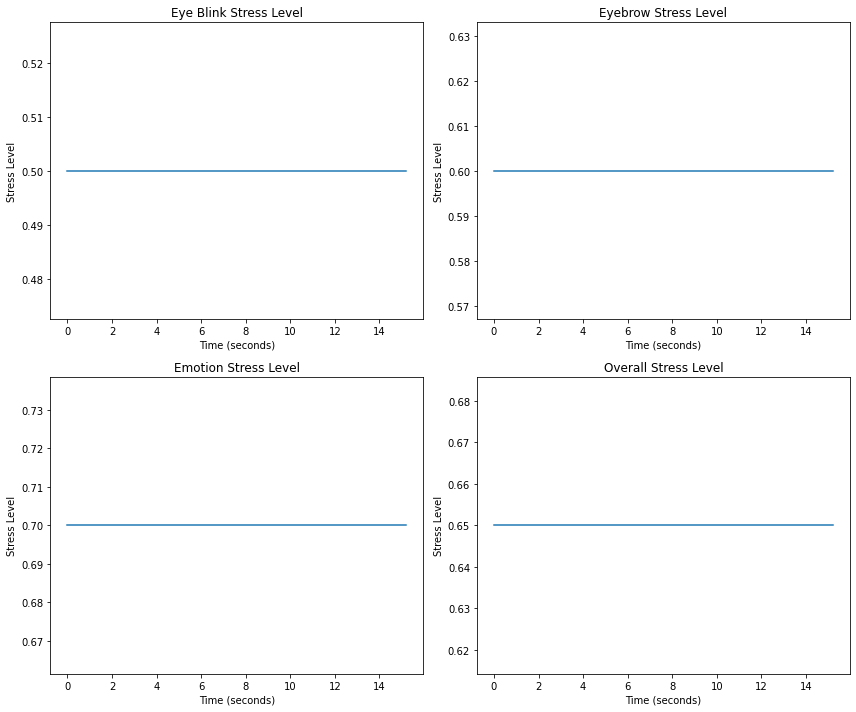

In [9]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(min_detection_confidence=0.3, min_tracking_confidence=0.3)

def calculate_eye_blink(landmarks):
    # Placeholder for eye blink calculation
    return 0.5

def calculate_eyebrow_movement(landmarks):
    # Placeholder for eyebrow movement calculation
    return 0.6

def calculate_emotion(landmarks):
    # Placeholder for emotion calculation
    return 0.7

def calculate_stress(eye_blink, eyebrow, emotion, lip_movement):
    # Calculate overall stress using the specified formula
    return 0.25 * eye_blink + 0.25 * eyebrow + 0.25 * emotion + 0.25 * lip_movement

def process_frame(frame):
    # Convert the frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detect facial landmarks
    results_landmarks = face_mesh.process(rgb_frame)

    if results_landmarks.multi_face_landmarks:
        landmarks = results_landmarks.multi_face_landmarks[0].landmark

        # Replace with actual factor calculation
        eye_blink = calculate_eye_blink(landmarks)
        eyebrow = calculate_eyebrow_movement(landmarks)
        emotion = calculate_emotion(landmarks)
        lip_movement = 0.8  # Placeholder for lip movement calculation

        stress_level = calculate_stress(eye_blink, eyebrow, emotion, lip_movement)
        return eye_blink, eyebrow, emotion, stress_level
    else:
        return 0.0, 0.0, 0.0, 0.0

def analyze_video(video_path):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video file.")
        return

    fps = cap.get(cv2.CAP_PROP_FPS)

    eye_blink_data, eyebrow_data, emotion_data, stress_data = [], [], [], []

    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        eye_blink, eyebrow, emotion, stress_level = process_frame(frame)

        eye_blink_data.append(eye_blink)
        eyebrow_data.append(eyebrow)
        emotion_data.append(emotion)
        stress_data.append(stress_level)

    cap.release()

    time_axis = [i / fps for i in range(len(eye_blink_data))]

    # Plot stress levels for each factor
    plt.figure(figsize=(12, 10))

    plt.subplot(221)
    plt.plot(time_axis, eye_blink_data)
    plt.title('Eye Blink Stress Level')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Stress Level')

    plt.subplot(222)
    plt.plot(time_axis, eyebrow_data)
    plt.title('Eyebrow Stress Level')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Stress Level')

    plt.subplot(223)
    plt.plot(time_axis, emotion_data)
    plt.title('Emotion Stress Level')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Stress Level')

    plt.subplot(224)
    plt.plot(time_axis, stress_data)
    plt.title('Overall Stress Level')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Stress Level')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    video_path = 'stressed.mp4'
    analyze_video(video_path)


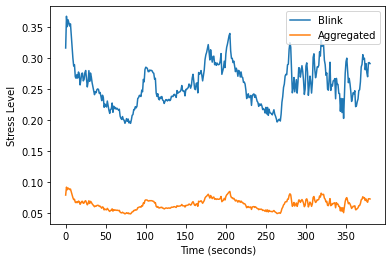

In [63]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

class StressDetectionApp:
    def __init__(self):
        # Initialize MediaPipe FaceMesh
        self.mp_face_mesh = mp.solutions.face_mesh
        self.face_mesh = self.mp_face_mesh.FaceMesh(min_detection_confidence=0.2, min_tracking_confidence=0.2)
        self.landmarks = None

        # Dictionary to store stress features
        self.stress_data = {"blink": [], "aggregated": []}

        # Placeholder for aggregated stress calculation
        self.aggregated_stress = 0

    def calculate_eye_blink(self):
        if self.landmarks is not None:
            # Convert landmarks to NumPy array for calculations
            landmarks_np = np.array([[landmark.x, landmark.y, landmark.z] for landmark in self.landmarks])

            left_eye_landmarks = landmarks_np[159:145:-1]  # Left eye landmarks
            right_eye_landmarks = landmarks_np[386:374:-1]  # Right eye landmarks

            left_eye_aspect_ratio = self.eye_aspect_ratio(left_eye_landmarks)
            right_eye_aspect_ratio = self.eye_aspect_ratio(right_eye_landmarks)

            # Average eye aspect ratio for both eyes
            avg_eye_aspect_ratio = (left_eye_aspect_ratio + right_eye_aspect_ratio) / 2.0

            return avg_eye_aspect_ratio

    @staticmethod
    def eye_aspect_ratio(eye):
        # Compute the euclidean distances between the two sets of vertical eye landmarks
        A = np.linalg.norm(eye[1] - eye[5])
        B = np.linalg.norm(eye[2] - eye[4])

        # Compute the euclidean distance between the horizontal eye landmarks
        C = np.linalg.norm(eye[0] - eye[3])

        # Compute the eye aspect ratio
        ear = (A + B) / (2.0 * C)

        return ear

    def process_frame(self, frame):
        # Convert the frame to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Run MediaPipe FaceMesh
        results = self.face_mesh.process(rgb_frame)

        if results.multi_face_landmarks:
            self.landmarks = results.multi_face_landmarks[0].landmark

            # Placeholder values for stress detection (you need to replace these with real values)
            blink = self.calculate_eye_blink()

            # Calculate aggregated stress level
            self.aggregated_stress = 0.25 * blink
            self.stress_data["blink"].append(blink)
            self.stress_data["aggregated"].append(self.aggregated_stress)

    def run(self, video_path):
        # Initialize video capture
        cap = cv2.VideoCapture(video_path)

        # Process video frames
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Process the frame
            self.process_frame(frame)

        # Release the video capture object
        cap.release()

        # Display the results
        #print(self.stress_data)

        # Plot stress features
        self.plot_stress()

    def plot_stress(self):
        seconds = range(len(self.stress_data["aggregated"]))
        plt.plot(seconds, self.stress_data["blink"], label="Blink")
        plt.plot(seconds, self.stress_data["aggregated"], label="Aggregated")
        plt.xlabel("Time (seconds)")
        plt.ylabel("Stress Level")
        plt.legend()
        plt.show()

if __name__ == "__main__":
    video_path = "stressed.mp4"
    app = StressDetectionApp()
    app.run(video_path)


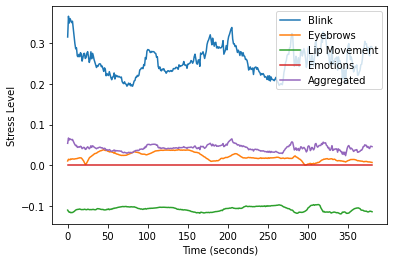

In [64]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

class StressDetectionApp:
    def __init__(self):
        # Initialize MediaPipe FaceMesh
        self.mp_face_mesh = mp.solutions.face_mesh
        self.face_mesh = self.mp_face_mesh.FaceMesh(min_detection_confidence=0.2, min_tracking_confidence=0.2)
        self.landmarks = None

        # Dictionary to store stress features
        self.stress_data = {"blink": [], "eyebrows": [], "lip_movement": [], "emotions": [], "aggregated": []}

        # Placeholder for aggregated stress calculation
        self.aggregated_stress = 0

    def calculate_eye_blink(self):
        if self.landmarks is not None:
            # Convert landmarks to NumPy array for calculations
            landmarks_np = np.array([[landmark.x, landmark.y, landmark.z] for landmark in self.landmarks])

            left_eye_landmarks = landmarks_np[159:145:-1]  # Left eye landmarks
            right_eye_landmarks = landmarks_np[386:374:-1]  # Right eye landmarks

            left_eye_aspect_ratio = self.eye_aspect_ratio(left_eye_landmarks)
            right_eye_aspect_ratio = self.eye_aspect_ratio(right_eye_landmarks)

            # Average eye aspect ratio for both eyes
            avg_eye_aspect_ratio = (left_eye_aspect_ratio + right_eye_aspect_ratio) / 2.0

            return avg_eye_aspect_ratio

    @staticmethod
    def eye_aspect_ratio(eye):
        # Compute the euclidean distances between the two sets of vertical eye landmarks
        A = np.linalg.norm(eye[1] - eye[5])
        B = np.linalg.norm(eye[2] - eye[4])

        # Compute the euclidean distance between the horizontal eye landmarks
        C = np.linalg.norm(eye[0] - eye[3])

        # Compute the eye aspect ratio
        ear = (A + B) / (2.0 * C)

        return ear

    def calculate_eyebrows(self):
        if self.landmarks is not None:
            # Extract the landmarks corresponding to the eyebrows
            left_eyebrow_landmarks = self.landmarks[55:65]
            right_eyebrow_landmarks = self.landmarks[285:295]

            # Calculate the average height of the eyebrows
            avg_left_eyebrow_height = np.mean([landmark.y for landmark in left_eyebrow_landmarks])
            avg_right_eyebrow_height = np.mean([landmark.y for landmark in right_eyebrow_landmarks])

            # Calculate the asymmetry of eyebrow height
            eyebrow_asymmetry = np.abs(avg_left_eyebrow_height - avg_right_eyebrow_height)

            return eyebrow_asymmetry

    def calculate_lip_movement(self):
        if self.landmarks is not None:
            # Extract the landmarks corresponding to the upper and lower lips
            upper_lip_landmarks = self.landmarks[61:65] + [self.landmarks[146]]
            lower_lip_landmarks = self.landmarks[65:68] + [self.landmarks[178]]

            # Calculate the vertical distance between upper and lower lips
            lip_distance = np.mean([landmark.y for landmark in lower_lip_landmarks]) - np.mean(
                [landmark.y for landmark in upper_lip_landmarks])

            return lip_distance

    def calculate_emotions(self):
        # To be implemented based on specific landmarks for different facial expressions
        # For example, you can use landmarks related to the mouth, eyes, etc.
        return 0  # Placeholder for emotion calculation

    def process_frame(self, frame):
        # Convert the frame to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Run MediaPipe FaceMesh
        results = self.face_mesh.process(rgb_frame)

        if results.multi_face_landmarks:
            self.landmarks = results.multi_face_landmarks[0].landmark

            # Placeholder values for stress detection (you need to replace these with real values)
            blink = self.calculate_eye_blink()
            eyebrows = self.calculate_eyebrows()
            lip_movement = self.calculate_lip_movement()
            emotions = self.calculate_emotions()

            # Calculate aggregated stress level
            self.aggregated_stress = 0.25 * blink + 0.25 * eyebrows + 0.25 * lip_movement + 0.25 * emotions
            self.stress_data["blink"].append(blink)
            self.stress_data["eyebrows"].append(eyebrows)
            self.stress_data["lip_movement"].append(lip_movement)
            self.stress_data["emotions"].append(emotions)
            self.stress_data["aggregated"].append(self.aggregated_stress)

    def run(self, video_path):
        # Initialize video capture
        cap = cv2.VideoCapture(video_path)

        # Process video frames
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Process the frame
            self.process_frame(frame)

        # Release the video capture object
        cap.release()

        # Display the results
        # print(self.stress_data)

        # Plot stress features
        self.plot_stress()

    def plot_stress(self):
        seconds = range(len(self.stress_data["aggregated"]))
        plt.plot(seconds, self.stress_data["blink"], label="Blink")
        plt.plot(seconds, self.stress_data["eyebrows"], label="Eyebrows")
        plt.plot(seconds, self.stress_data["lip_movement"], label="Lip Movement")
        plt.plot(seconds, self.stress_data["emotions"], label="Emotions")
        plt.plot(seconds, self.stress_data["aggregated"], label="Aggregated")
        plt.xlabel("Time (seconds)")
        plt.ylabel("Stress Level")
        plt.legend()
        plt.show()

if __name__ == "__main__":
    video_path = "stressed.mp4"
    app = StressDetectionApp()
    app.run(video_path)


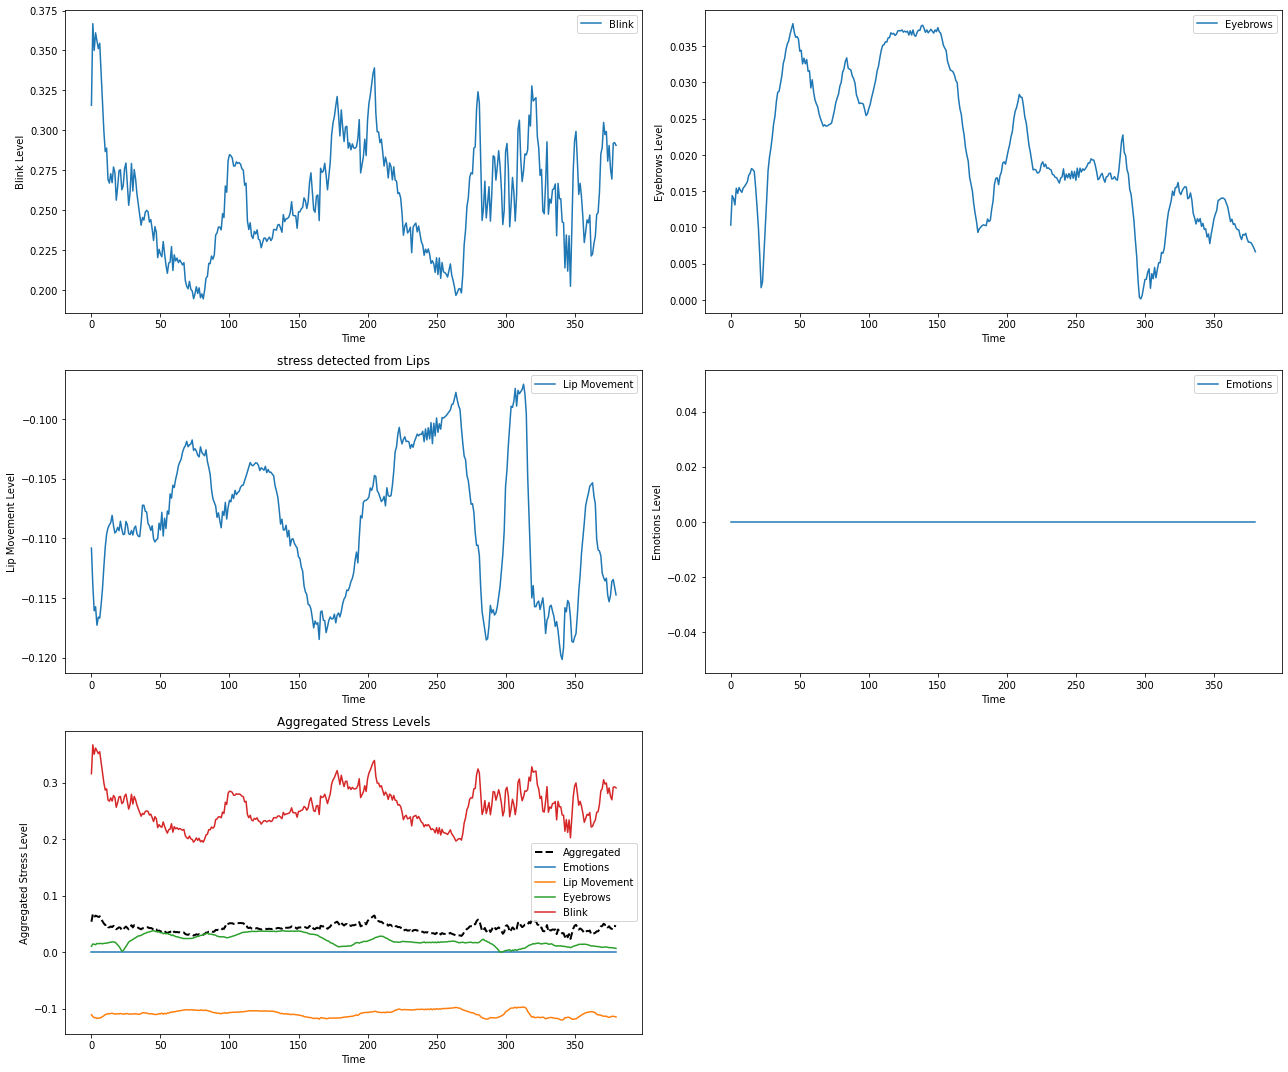

In [112]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

class StressDetectionApp:
    def __init__(self):
        # Initialize MediaPipe FaceMesh
        self.mp_face_mesh = mp.solutions.face_mesh
        self.mp_hands = mp.solutions.hands
        self.face_mesh = self.mp_face_mesh.FaceMesh(min_detection_confidence=0.2, min_tracking_confidence=0.2)
        self.hands = self.mp_hands.Hands(min_detection_confidence=0.2, min_tracking_confidence=0.2)
        self.landmarks_face = None
        self.landmarks_hand = None

        # Dictionary to store stress features
        self.stress_data = {"blink": [], "eyebrows": [], "lip_movement": [], "emotions": [], "aggregated": []}

        # Placeholder for aggregated stress calculation
        self.aggregated_stress = 0

    def calculate_eye_blink(self):
        if self.landmarks is not None:
            # Convert landmarks to NumPy array for calculations
            landmarks_np = np.array([[landmark.x, landmark.y, landmark.z] for landmark in self.landmarks])

            left_eye_landmarks = landmarks_np[159:145:-1]  # Left eye landmarks
            right_eye_landmarks = landmarks_np[386:374:-1]  # Right eye landmarks

            left_eye_aspect_ratio = self.eye_aspect_ratio(left_eye_landmarks)
            right_eye_aspect_ratio = self.eye_aspect_ratio(right_eye_landmarks)

            # Average eye aspect ratio for both eyes
            avg_eye_aspect_ratio = (left_eye_aspect_ratio + right_eye_aspect_ratio) / 2.0

            return avg_eye_aspect_ratio

    @staticmethod
    def eye_aspect_ratio(eye):
        # Compute the euclidean distances between the two sets of vertical eye landmarks
        A = np.linalg.norm(eye[1] - eye[5])
        B = np.linalg.norm(eye[2] - eye[4])

        # Compute the euclidean distance between the horizontal eye landmarks
        C = np.linalg.norm(eye[0] - eye[3])

        # Compute the eye aspect ratio
        ear = (A + B) / (2.0 * C)

        return ear

    def calculate_eyebrows(self):
        if self.landmarks is not None:
            # Extract the landmarks corresponding to the eyebrows
            left_eyebrow_landmarks = self.landmarks[55:65]
            right_eyebrow_landmarks = self.landmarks[285:295]

            # Calculate the average height of the eyebrows
            avg_left_eyebrow_height = np.mean([landmark.y for landmark in left_eyebrow_landmarks])
            avg_right_eyebrow_height = np.mean([landmark.y for landmark in right_eyebrow_landmarks])

            # Calculate the asymmetry of eyebrow height
            eyebrow_asymmetry = np.abs(avg_left_eyebrow_height - avg_right_eyebrow_height)

            return eyebrow_asymmetry

    def calculate_lip_movement(self):
        if self.landmarks is not None:
            # Extract the landmarks corresponding to the upper and lower lips
            upper_lip_landmarks = self.landmarks[61:65] + [self.landmarks[146]]
            lower_lip_landmarks = self.landmarks[65:68] + [self.landmarks[178]]

            # Calculate the vertical distance between upper and lower lips
            lip_distance = np.mean([landmark.y for landmark in lower_lip_landmarks]) - np.mean(
                [landmark.y for landmark in upper_lip_landmarks])

            return lip_distance

    def calculate_emotions(self):
        # To be implemented based on specific landmarks for different facial expressions
        # For example, you can use landmarks related to the mouth, eyes, etc.
        return 0  # Placeholder for emotion calculation

    def process_frame(self, frame):
        # Convert the frame to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Run MediaPipe FaceMesh
        results = self.face_mesh.process(rgb_frame)

        if results.multi_face_landmarks:
            self.landmarks = results.multi_face_landmarks[0].landmark

            # Placeholder values for stress detection (you need to replace these with real values)
            blink = self.calculate_eye_blink()
            eyebrows = self.calculate_eyebrows()
            lip_movement = self.calculate_lip_movement()
            emotions = self.calculate_emotions()

            # Calculate aggregated stress level
            self.aggregated_stress = 0.25 * blink + 0.25 * eyebrows + 0.25 * lip_movement + 0.25 * emotions
            self.stress_data["blink"].append(blink)
            self.stress_data["eyebrows"].append(eyebrows)
            self.stress_data["lip_movement"].append(lip_movement)
            self.stress_data["emotions"].append(emotions)
            self.stress_data["aggregated"].append(self.aggregated_stress)

            # Display the landmarks on the frame
            self.draw_landmarks(frame)

    def draw_landmarks(self, frame):
        h, w, _ = frame.shape
        landmarks_x = [int(landmark.x * w) for landmark in self.landmarks]
        landmarks_y = [int(landmark.y * h) for landmark in self.landmarks]

        # Draw landmarks on the frame
        for x, y in zip(landmarks_x, landmarks_y):
            cv2.circle(frame, (x, y), 1, (0, 255, 0), 1)

     
    def run(self, video_path):
        # Initialize video capture
        cap = cv2.VideoCapture(video_path)

        # Process video frames
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Process the frame
            self.process_frame(frame)

            # Display the frame
            cv2.imshow("Stress Detection", frame)

            # Break the loop if 'q' key is pressed
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        # Release the video capture object
        cap.release()

        # Close all OpenCV windows
        cv2.destroyAllWindows()

        # Display the results
        # print(self.stress_data)

        # Plot stress features
        self.plot_stress()

    
    def plot_stress(self):
        seconds = range(len(self.stress_data["aggregated"]))
    
        # Plot Blink
        plt.figure(figsize=(18, 15))
        plt.subplot(3, 2, 1)
        plt.plot(seconds, self.stress_data["blink"], label="Blink")
        plt.xlabel("Time")
        plt.ylabel("Blink Level")
        plt.legend()
    
        # Plot Eyebrows
        plt.subplot(3, 2, 2)
        plt.plot(seconds, self.stress_data["eyebrows"], label="Eyebrows")
        plt.xlabel("Time")
        plt.ylabel("Eyebrows Level")
        plt.legend()
    
        # Plot Lip Movement
        plt.subplot(3, 2, 3)
        plt.plot(seconds, self.stress_data["lip_movement"], label="Lip Movement")
        plt.title('stress detected from Lips')
        plt.xlabel("Time")
        plt.ylabel("Lip Movement Level")
        plt.legend()
    
        # Plot Emotions
        plt.subplot(3, 2, 4)
        plt.plot(seconds, self.stress_data["emotions"], label="Emotions")
        plt.xlabel("Time")
        plt.ylabel("Emotions Level")
        plt.legend()
    
        # Plot Aggregated Stress
        plt.subplot(3, 2, 5)
        plt.plot(seconds, self.stress_data["aggregated"], label="Aggregated", linestyle='dashed', linewidth=2, color='black')
        plt.plot(seconds, self.stress_data["emotions"], label="Emotions")
        plt.plot(seconds, self.stress_data["lip_movement"], label="Lip Movement")
        plt.plot(seconds, self.stress_data["eyebrows"], label="Eyebrows")
        plt.plot(seconds, self.stress_data["blink"], label="Blink")
        plt.xlabel("Time")
  
        plt.ylabel("Aggregated Stress Level")
        plt.legend()
    
        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    video_path = "stressed.mp4"
    app = StressDetectionApp()
    app.run(video_path)


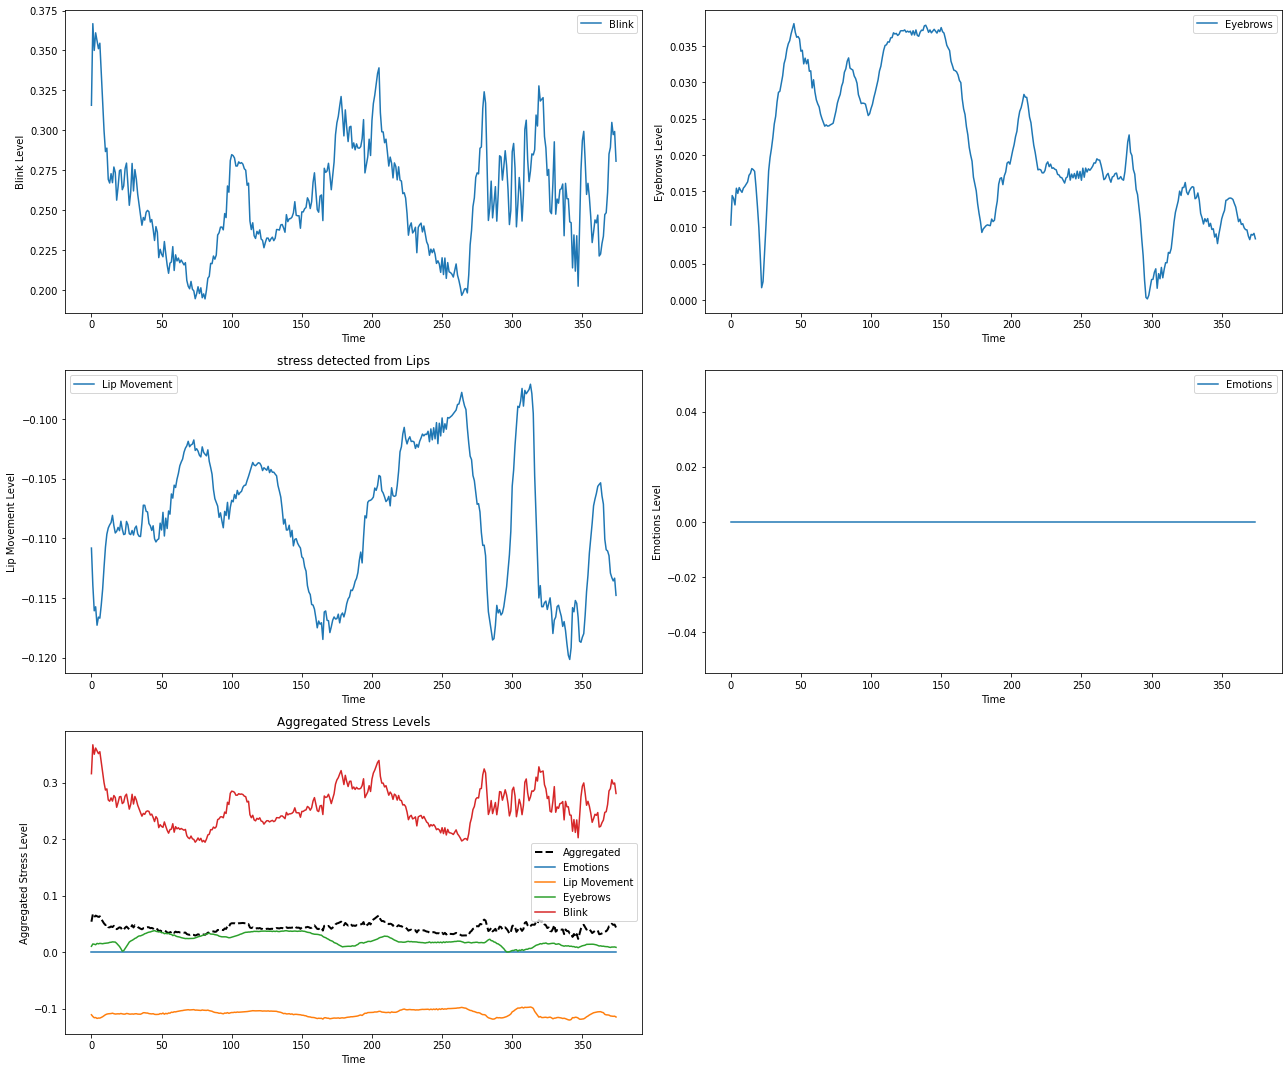

In [121]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

class StressDetectionApp:
    def __init__(self):
        # Initialize MediaPipe FaceMesh
        self.mp_face_mesh = mp.solutions.face_mesh
        self.mp_hands = mp.solutions.hands
        self.face_mesh = self.mp_face_mesh.FaceMesh(min_detection_confidence=0.2, min_tracking_confidence=0.2)
        self.hands = self.mp_hands.Hands(min_detection_confidence=0.2, min_tracking_confidence=0.2)
        self.landmarks_face = None
        self.landmarks_hand = None

        # Dictionary to store stress features
        self.stress_data = {"blink": [], "eyebrows": [], "lip_movement": [], "emotions": [], "aggregated": []}

        # Placeholder for aggregated stress calculation
        self.aggregated_stress = 0

    def calculate_eye_blink(self):
        if self.landmarks is not None:
            # Convert landmarks to NumPy array for calculations
            landmarks_np = np.array([[landmark.x, landmark.y, landmark.z] for landmark in self.landmarks])

            left_eye_landmarks = landmarks_np[159:145:-1]  # Left eye landmarks
            right_eye_landmarks = landmarks_np[386:374:-1]  # Right eye landmarks

            left_eye_aspect_ratio = self.eye_aspect_ratio(left_eye_landmarks)
            right_eye_aspect_ratio = self.eye_aspect_ratio(right_eye_landmarks)

            # Average eye aspect ratio for both eyes
            avg_eye_aspect_ratio = (left_eye_aspect_ratio + right_eye_aspect_ratio) / 2.0

            return avg_eye_aspect_ratio

    @staticmethod
    def eye_aspect_ratio(eye):
        # Compute the euclidean distances between the two sets of vertical eye landmarks
        A = np.linalg.norm(eye[1] - eye[5])
        B = np.linalg.norm(eye[2] - eye[4])

        # Compute the euclidean distance between the horizontal eye landmarks
        C = np.linalg.norm(eye[0] - eye[3])

        # Compute the eye aspect ratio
        ear = (A + B) / (2.0 * C)

        return ear

    def calculate_eyebrows(self):
        if self.landmarks is not None:
            # Extract the landmarks corresponding to the eyebrows
            left_eyebrow_landmarks = self.landmarks[55:65]
            right_eyebrow_landmarks = self.landmarks[285:295]

            # Calculate the average height of the eyebrows
            avg_left_eyebrow_height = np.mean([landmark.y for landmark in left_eyebrow_landmarks])
            avg_right_eyebrow_height = np.mean([landmark.y for landmark in right_eyebrow_landmarks])

            # Calculate the asymmetry of eyebrow height
            eyebrow_asymmetry = np.abs(avg_left_eyebrow_height - avg_right_eyebrow_height)

            return eyebrow_asymmetry

    def calculate_lip_movement(self):
        if self.landmarks is not None:
            # Extract the landmarks corresponding to the upper and lower lips
            upper_lip_landmarks = self.landmarks[61:65] + [self.landmarks[146]]
            lower_lip_landmarks = self.landmarks[65:68] + [self.landmarks[178]]

            # Calculate the vertical distance between upper and lower lips
            lip_distance = np.mean([landmark.y for landmark in lower_lip_landmarks]) - np.mean(
                [landmark.y for landmark in upper_lip_landmarks])

            return lip_distance

    def calculate_emotions(self):
        # To be implemented based on specific landmarks for different facial expressions
        # For example, you can use landmarks related to the mouth, eyes, etc.
        return 0  # Placeholder for emotion calculation

    def process_frame(self, frame):
        # Convert the frame to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Run MediaPipe FaceMesh
        results = self.face_mesh.process(rgb_frame)

        if results.multi_face_landmarks:
            self.landmarks = results.multi_face_landmarks[0].landmark

            # Placeholder values for stress detection (you need to replace these with real values)
            blink = self.calculate_eye_blink()
            eyebrows = self.calculate_eyebrows()
            lip_movement = self.calculate_lip_movement()
            emotions = self.calculate_emotions()

            # Calculate aggregated stress level
            self.aggregated_stress = 0.25 * blink + 0.25 * eyebrows + 0.25 * lip_movement + 0.25 * emotions
            self.stress_data["blink"].append(blink)
            self.stress_data["eyebrows"].append(eyebrows)
            self.stress_data["lip_movement"].append(lip_movement)
            self.stress_data["emotions"].append(emotions)
            self.stress_data["aggregated"].append(self.aggregated_stress)

            # Display the landmarks on the frame
            self.draw_landmarks(frame)

    def draw_landmarks(self, frame):
        h, w, _ = frame.shape
        landmarks_x = [int(landmark.x * w) for landmark in self.landmarks]
        landmarks_y = [int(landmark.y * h) for landmark in self.landmarks]

        # Draw landmarks on the frame
        for x, y in zip(landmarks_x, landmarks_y):
            cv2.circle(frame, (x, y), 1, (0, 255, 0), 1)

     
    def run(self, video_path):
        # Initialize video capture
        cap = cv2.VideoCapture(video_path)

        # Process video frames
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Process the frame
            self.process_frame(frame)

            # Display the frame
            cv2.imshow("Stress Detection", frame)

            # Break the loop if 'q' key is pressed
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        # Release the video capture object
        cap.release()

        # Close all OpenCV windows
        cv2.destroyAllWindows()

        # Display the results
        # print(self.stress_data)

        # Plot stress features
        self.plot_stress()

    
    def plot_stress(self):
        seconds = range(len(self.stress_data["aggregated"]))
    
        # Plot Blink
        plt.figure(figsize=(18, 15))
        plt.subplot(3, 2, 1)
        plt.plot(seconds, self.stress_data["blink"], label="Blink")
        plt.xlabel("Time")
        plt.ylabel("Blink Level")
        plt.legend()
    
        # Plot Eyebrows
        plt.subplot(3, 2, 2)
        plt.plot(seconds, self.stress_data["eyebrows"], label="Eyebrows")
        plt.xlabel("Time")
        plt.ylabel("Eyebrows Level")
        plt.legend()
    
        # Plot Lip Movement
        plt.subplot(3, 2, 3)
        plt.plot(seconds, self.stress_data["lip_movement"], label="Lip Movement")
        plt.title('stress detected from Lips')
        plt.xlabel("Time")
        plt.ylabel("Lip Movement Level")
        plt.legend()
    
        # Plot Emotions
        plt.subplot(3, 2, 4)
        plt.plot(seconds, self.stress_data["emotions"], label="Emotions")
        plt.xlabel("Time")
        plt.ylabel("Emotions Level")
        plt.legend()
    
        # Plot Aggregated Stress
        plt.subplot(3, 2, 5)
        plt.plot(seconds, self.stress_data["aggregated"], label="Aggregated", linestyle='dashed', linewidth=2, color='black')
        plt.plot(seconds, self.stress_data["emotions"], label="Emotions")
        plt.plot(seconds, self.stress_data["lip_movement"], label="Lip Movement")
        plt.plot(seconds, self.stress_data["eyebrows"], label="Eyebrows")
        plt.plot(seconds, self.stress_data["blink"], label="Blink")
        plt.xlabel("Time")
        plt.title('Aggregated Stress Levels')

        plt.ylabel("Aggregated Stress Level")
        plt.legend()
    
        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    video_path = "stressed.mp4"
    app = StressDetectionApp()
    app.run(video_path)

{'blink': [0.3156655780322968, 0.3667870790708073, 0.35002245912401864, 0.3610383789168724, 0.35594393193156537, 0.3511038008861008, 0.3545362249997165, 0.3359056562267438, 0.31779122504660684, 0.29964513371674495, 0.28666115293168337, 0.28882664195327623, 0.26922755173354707, 0.2669578804909858, 0.2728313727641191, 0.2671801264262586, 0.27699326239691213, 0.27354356229635246, 0.2562223559104105, 0.26454639334897245, 0.2747367741886899, 0.27526935147890697, 0.2627786441339593, 0.265096576983541, 0.275950894637857, 0.2794422894157327, 0.2664046744463353, 0.25300284666306116, 0.2611772576879026, 0.2792308794733312, 0.2620010389997758, 0.27537524974922817, 0.2694109407490224, 0.25985912717923265, 0.25304978110431253, 0.2467524583640875, 0.24052818784978955], 'eyebrows': [0.010329934954643238, 0.014392134547233537, 0.013994301855564106, 0.013101987540721893, 0.015401971340179454, 0.01468928456306462, 0.015490734577178922, 0.015110054612159751, 0.014836785197258007, 0.0154158756136894, 0.01

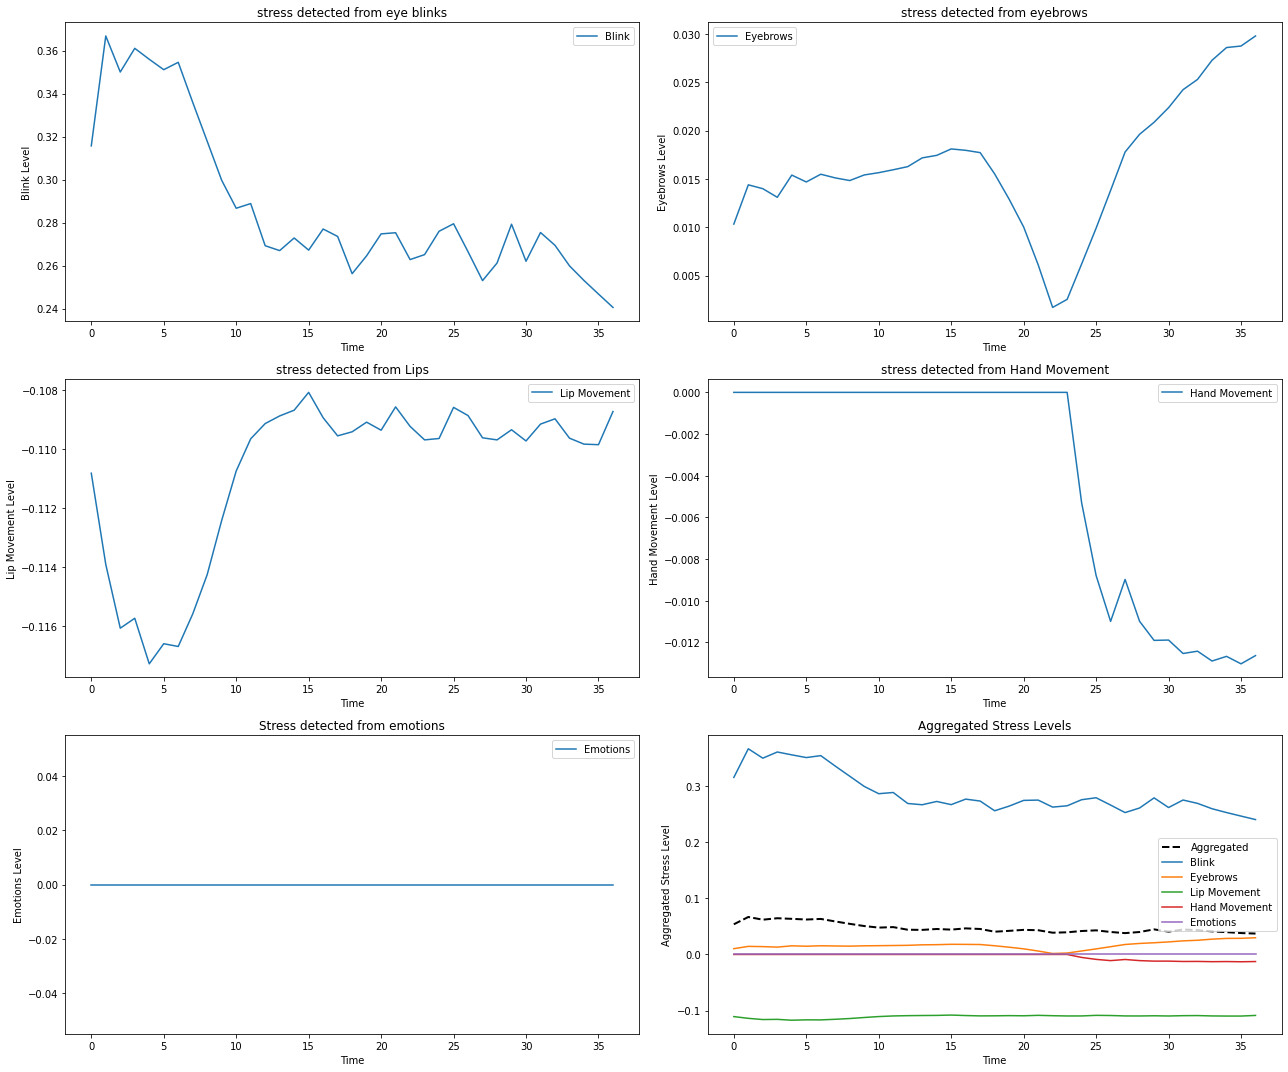

TypeError: 'int' object is not iterable

In [136]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
import json

class StressDetectionApp:
    def __init__(self):
        # Initialize MediaPipe FaceMesh and Hands
        self.mp_face_mesh = mp.solutions.face_mesh
        self.mp_hands = mp.solutions.hands
        self.face_mesh = self.mp_face_mesh.FaceMesh(min_detection_confidence=0.2, min_tracking_confidence=0.2)
        self.hands = self.mp_hands.Hands(min_detection_confidence=0.2, min_tracking_confidence=0.2)
        self.landmarks_face = None
        self.landmarks_hand = None

        # Dictionary to store stress features
        self.stress_data = {"blink": [], "eyebrows": [], "lip_movement": [], "emotions": [], "hand_movement": [], "aggregated": []}

        # Placeholder for aggregated stress calculation
        self.aggregated_stress = 0

    def calculate_eye_blink(self):
        if self.landmarks_face is not None:
            # Convert landmarks to NumPy array for calculations
            landmarks_np = np.array([[landmark.x, landmark.y, landmark.z] for landmark in self.landmarks_face])

            left_eye_landmarks = landmarks_np[159:145:-1]  # Left eye landmarks
            right_eye_landmarks = landmarks_np[386:374:-1]  # Right eye landmarks

            left_eye_aspect_ratio = self.eye_aspect_ratio(left_eye_landmarks)
            right_eye_aspect_ratio = self.eye_aspect_ratio(right_eye_landmarks)

            # Average eye aspect ratio for both eyes
            avg_eye_aspect_ratio = (left_eye_aspect_ratio + right_eye_aspect_ratio) / 2.0

            return avg_eye_aspect_ratio

    @staticmethod
    def eye_aspect_ratio(eye):
        # Compute the euclidean distances between the two sets of vertical eye landmarks
        A = np.linalg.norm(eye[1] - eye[5])
        B = np.linalg.norm(eye[2] - eye[4])

        # Compute the euclidean distance between the horizontal eye landmarks
        C = np.linalg.norm(eye[0] - eye[3])

        # Compute the eye aspect ratio
        ear = (A + B) / (2.0 * C)

        return ear

    def calculate_eyebrows(self):
        if self.landmarks_face is not None:
            # Extract the landmarks corresponding to the eyebrows
            left_eyebrow_landmarks = self.landmarks_face[55:65]
            right_eyebrow_landmarks = self.landmarks_face[285:295]

            # Calculate the average height of the eyebrows
            avg_left_eyebrow_height = np.mean([landmark.y for landmark in left_eyebrow_landmarks])
            avg_right_eyebrow_height = np.mean([landmark.y for landmark in right_eyebrow_landmarks])

            # Calculate the asymmetry of eyebrow height
            eyebrow_asymmetry = np.abs(avg_left_eyebrow_height - avg_right_eyebrow_height)

            return eyebrow_asymmetry

    def calculate_lip_movement(self):
        if self.landmarks_face is not None:
            # Extract the landmarks corresponding to the upper and lower lips
            upper_lip_landmarks = self.landmarks_face[61:65] + [self.landmarks_face[146]]
            lower_lip_landmarks = self.landmarks_face[65:68] + [self.landmarks_face[178]]

            # Calculate the vertical distance between upper and lower lips
            lip_distance = np.mean([landmark.y for landmark in lower_lip_landmarks]) - np.mean(
                [landmark.y for landmark in upper_lip_landmarks])

            return lip_distance

    def calculate_emotions(self):
        # To be implemented based on specific landmarks for different facial expressions
        # For example, you can use landmarks related to the mouth, eyes, etc.
        return 0  # Placeholder for emotion calculation

    def calculate_hand_movement(self):
        if self.landmarks_hand is not None:
            # Extract the landmarks corresponding to the hand
            hand_landmarks_np = np.array([[landmark.x, landmark.y, landmark.z] for landmark in self.landmarks_hand.landmark])

            # Calculate the hand movement based on the average change in Y coordinates of hand landmarks
            hand_movement = np.mean(np.diff(hand_landmarks_np[:, 1]))

            return hand_movement
        else:
            return 0

    def process_frame(self, frame):
        # Convert the frame to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Run MediaPipe FaceMesh and Hands
        results_face = self.face_mesh.process(rgb_frame)
        results_hand = self.hands.process(rgb_frame)

        if results_face.multi_face_landmarks:
            self.landmarks_face = results_face.multi_face_landmarks[0].landmark

            # Placeholder values for stress detection (you need to replace these with real values)
            blink = self.calculate_eye_blink()
            eyebrows = self.calculate_eyebrows()
            lip_movement = self.calculate_lip_movement()

            # Check if hand landmarks are available
            hand_movement = self.calculate_hand_movement()

            emotions = self.calculate_emotions()

            # Calculate aggregated stress level
            self.aggregated_stress = 0.25 * blink + 0.25 * eyebrows + 0.25 * lip_movement + 0.25 * hand_movement
            self.stress_data["blink"].append(blink)
            self.stress_data["eyebrows"].append(eyebrows)
            self.stress_data["lip_movement"].append(lip_movement)
            self.stress_data["hand_movement"].append(hand_movement)
            self.stress_data["emotions"].append(emotions)
            self.stress_data["aggregated"].append(self.aggregated_stress)

            # Display the landmarks on the frame
            self.draw_landmarks(frame)

        if results_hand.multi_hand_landmarks:
            self.landmarks_hand = results_hand.multi_hand_landmarks[0]

    def draw_landmarks(self, frame):
        h, w, _ = frame.shape
        landmarks_x = [int(landmark.x * w) for landmark in self.landmarks_face]
        landmarks_y = [int(landmark.y * h) for landmark in self.landmarks_face]

        # Draw landmarks on the frame
        for x, y in zip(landmarks_x, landmarks_y):
            cv2.circle(frame, (x, y), 1, (0, 255, 0), 1)

    def run(self, video_path):
        # Initialize video capture
        cap = cv2.VideoCapture(video_path)

        # Process video frames
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Process the frame
            self.process_frame(frame)

            # Display the frame
            cv2.imshow("Stress Detection", frame)

            # Break the loop if 'q' key is pressed
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        # Release the video capture object
        cap.release()

        # Close all OpenCV windows
        cv2.destroyAllWindows()

        # Display the results
        print(self.stress_data)

        # Plot stress features
        self.plot_stress()

        # Create a dictionary for the output JSON
        output_data = {"seconds": list(len(self.stress_data)),
                       "blink": self.stress_data["blink"],
                       "eyebrows": self.stress_data["eyebrows"],
                       "lip_movement": self.stress_data["lip_movement"],
                       "emotions": self.stress_data["emotions"],
                       "aggregated": self.stress_data["aggregated"]}
        # Save the output JSON
        output_filename = "stress_output.json"  # Corrected filename
        with open(output_filename, "w") as json_file:
            json.dump(output_data, json_file, indent=2)

    def plot_stress(self):
        seconds = range(len(self.stress_data["aggregated"]))

        # Plot Blink
        plt.figure(figsize=(18, 15))
        plt.subplot(3, 2, 1)
        plt.plot(seconds, self.stress_data["blink"], label="Blink")
        plt.xlabel("Time")
        plt.ylabel("Blink Level")
        plt.title('stress detected from eye blinks')

        plt.legend()

        # Plot Eyebrows
        plt.subplot(3, 2, 2)
        plt.plot(seconds, self.stress_data["eyebrows"], label="Eyebrows")
        plt.xlabel("Time")
        plt.ylabel("Eyebrows Level")        
        plt.title('stress detected from eyebrows')

        plt.legend()

        # Plot Lip Movement
        plt.subplot(3, 2, 3)
        plt.plot(seconds, self.stress_data["lip_movement"], label="Lip Movement")
        plt.title('stress detected from Lips')
        plt.xlabel("Time")
        plt.ylabel("Lip Movement Level")
        plt.legend()

        # Plot Hand Movement
        plt.subplot(3, 2, 4)
        plt.plot(seconds, self.stress_data["hand_movement"], label="Hand Movement")
        plt.title('stress detected from Hand Movement')
        plt.xlabel("Time")
        plt.ylabel("Hand Movement Level")
        plt.legend()

        # Plot Emotions
        plt.subplot(3, 2, 5)
        plt.plot(seconds, self.stress_data["emotions"], label="Emotions")
        plt.title('Stress detected from emotions')
        plt.xlabel("Time")
        plt.ylabel("Emotions Level")
        plt.legend()

        # Plot Aggregated Stress
        plt.subplot(3, 2, 6)
        plt.plot(seconds, self.stress_data["aggregated"], label="Aggregated", linestyle='dashed', linewidth=2, color='black')
        plt.plot(seconds, self.stress_data["blink"], label="Blink")
        plt.plot(seconds, self.stress_data["eyebrows"], label="Eyebrows")
        plt.plot(seconds, self.stress_data["lip_movement"], label="Lip Movement")
        plt.plot(seconds, self.stress_data["hand_movement"], label="Hand Movement")
        plt.plot(seconds, self.stress_data["emotions"], label="Emotions")
        plt.xlabel("Time")
        plt.title('Aggregated Stress Levels')
        plt.ylabel("Aggregated Stress Level")
        plt.legend()

        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    video_path = "stressed.mp4"
    app = StressDetectionApp()
    app.run(video_path)
